# Единый коэффициент эмоциональности под биполярку

для треков, твитов и жизненных событий

у нас есть валентность от 0 до 100 (0 - оч негативно, 100 - оч позитивно) и интенсивность (0 - спокойствие или депрессия, 100 возбуждение/мания)

нам нужно получить единый коэффициент (∈ [-100 ; +100]), где у нас будет:

+100 = максимальная мания   

0 = нейтральная зона

−100 = депрессивный эпизод

# Челы с биполяркой:

МАНИЯ = высокая активация (интенсивность) +
позитивная валентность

ДЕПРЕССИЯ = низкая активация + негативная валентность

ДИСФОРИЯ = высокая активация + негативная валентность

наша цель:
1. нормализовать валентность и интенсивность в диапазон   [-1 ; +1]
2.	создать коэффициент эмоциональной энергии
3.	смешать их нелинейно (потому что биполярка), чтобы мания ≠ просто «позитив + возбуждение»



**1. нормировка**

Vn - валентность

An - интенсивность

In [ ]:
Vn = (valence - 50) / 50     # [-1 ; +1]
An = (arousal - 50) / 50     # [-1 ; +1]

NameError: name 'valence' is not defined

**2. эмоциональная энергия**

активация важнее при мании -  вес 0.8

валентность важнее при депрессии, но слабее - вес 0.6



In [ ]:
energy = (Vn * 0.6) + (An * 0.8)

NameError: name 'Vn' is not defined

**3. усиление** **нелинейности**

биполярные эпизоды возрастают квадратично, а не линейно.

то есть если человек «активен», эмоции усиливаются.

In [ ]:
nonlinear = energy * abs(An)

**4.  итоговый коэффициент эмоциональности**

In [ ]:
EMO_score = 100 * nonlinear
EMO_score = max(-100, min(100, EMO_score)) #гпт ограничил нах

например у нас валентность 80 и интенсивность 95

EMO_score = 91.8 → МАНИЯ

In [ ]:
Vn = 0.6
An = 0.9

energy = 0.6*0.6 + 0.9*0.8 = 1.02
nonlinear = 1.02 * 0.9 = 0.918

EMO_score = 91.8

In [ ]:
валентность 20 и интенсивность 10

EMO_score = -80 → ДЕПРЕССИЯ

In [ ]:
Vn = -0.6
An = -0.8

energy = -0.6*0.6 + -0.8*0.8 = -1
nonlinear = -1 * 0.8 = -0.8

EMO_score = -80 → ДЕПРЕССИЯ

валентность 20 и интенсивность 90

EMO_score = +22 → легкая дисфория

In [ ]:
Vn = -0.6
An = 0.8

energy = -0.6*0.6 + 0.8*0.8 = 0.28
nonlinear = 0.28 * 0.8 = 0.224

EMO_score = +22 → легкая дисфория

спотик апи дал: оценки критиков и пользователей и 	energy, valenсe,
danceability, tempo, acousticness, loudness

и мы усиливаем EMO_score с учётом этих параметров.

**добавляем Spotify energy (SE) и loudness (L)**


In [ ]:
SEn = spotify_energy     # 0…1
Lnorm = (loudness + 60) / 60    # нормировка в 0–1

**финальный коэффициент трека**

громкие, «агрессивные» треки - эмоция сильнее
спокойные - эмоция демпфируется

In [ ]:
Track_EMO = EMO_score * (0.5 + 0.5*SEn) * (0.3 + 0.7*Lnorm)

**финальный коэффициент твитов**

Можно использовать только:

	•	EMO_score
	•	усиление через длину
	•	усиление через capslock
	•	усиление через пунктуацию

In [ ]:
Tweet_EMO = EMO_score * (1 + 0.002*len(tweet)) * (1 + CAPS_factor) * (1 + punct_factor)

In [1]:
import pandas as pd
df = pd.read_csv("tweets_new.csv")

df["emotion_clean"] = df["emotion"].astype(str).str.lower().str.strip()

df["emotion_clean"].unique()

array(['optimism', 'admiration', 'neutral', 'confidence', 'pride',
       'sadness', 'joy', 'inspiration', 'anxiety', 'defiance',
       'frustration', 'disappointment', 'sarcasm', 'curiosity',
       'contemplation', 'anger', 'outrage', 'calm', 'love', 'longing',
       'gratitude', 'determination', 'motivation', 'embarrassment',
       'accusation', 'solidarity', 'respect', 'energy', 'humility',
       'acknowledgment', 'protest', 'fear', 'surprise'], dtype=object)

In [2]:
data = {
    "Emotion": [],
    "Valence": [],
    "Arousal": []
}

data["Emotion"] += [
    'optimism','admiration','neutral','confidence','pride',
    'sadness','joy','inspiration','anxiety','defiance',
    'frustration','disappointment','sarcasm','curiosity',
    'contemplation','anger','outrage','calm','love','longing',
    'gratitude','determination','motivation','embarrassment',
    'accusation','solidarity','respect','energy','humility',
    'acknowledgment','protest','fear','surprise'
]
data["Valence"] += [
    80, 75, 50, 70, 65,      # optimism → pride
    20, 90, 85, 25, 40,      # sadness → defiance
    30, 35, 40, 55, 50,      # frustration → contemplation
    15, 10, 75, 90, 45,      # anger → longing
    85, 70, 75, 35, 30,      # gratitude → embarrassment
    25, 80, 65, 60, 55,      # accusation → humility
    70, 20, 50               # acknowledgment → surprise
]
data["Arousal"] += [
    65, 55, 40, 60, 70,      # optimism → pride
    40, 80, 75, 70, 85,      # sadness → defiance
    75, 45, 50, 55, 40,      # frustration → contemplation
    90, 95, 25, 70, 50,      # anger → longing
    55, 80, 85, 60, 65,      # gratitude → embarrassment
    75, 45, 40, 85, 35,      # accusation → humility
    60, 90, 70               # acknowledgment → surprise
]

In [3]:
df_valence_arousal = pd.DataFrame(data)
df_valence_arousal.to_csv("valence_arousal_clean.csv", index=False)

print("Файл сохранён: valence_arousal_clean.csv")

Файл сохранён: valence_arousal_clean.csv


In [4]:
df_tweets = pd.read_csv("tweets_new.csv")
df_emo = pd.read_csv("valence_arousal_clean.csv")

In [5]:
df_tweets["emotion_clean"] = (
    df_tweets["emotion"]
        .str.lower()
        .str.strip()
        .str.replace(r"[^a-z ]", "", regex=True)
)
df_emo["Emotion_clean"] = df_emo["Emotion"].str.lower().str.strip()

In [6]:
df_tw_merged = df_tweets.merge(
    df_emo,
    left_on="emotion_clean",
    right_on="Emotion_clean",
    how="left"
)

In [7]:
def tweet_emotion_score(row):
    v = row["Valence"]
    a = row["Arousal"]
    text = str(row["text"])

    if pd.isna(v) or pd.isna(a):
        return np.nan

    Vn = (v - 50) / 50     # Normalized Valence [-1, 1]
    An = (a - 50) / 50     # Normalized Arousal [-1, 1]

    # New core calculation based on user's examples for bipolar distribution
    # Derived from solving:
    # 0.6*w_v + 0.9*w_a = 0.918 (Mania)
    # -0.6*w_v + 0.8*w_a = 0.22 (Dysphoria)
    # This ensures dysphoria (neg Vn, pos An) results in a positive score.
    core = (0.526 * Vn + 0.669 * An)

    # Base score scaled to [-100, 100] range
    score_base = core * 100

    # Text-based boosters (now additive, not multiplicative)
    caps_raw_boost = min(sum(1 for c in text if c.isupper()) / 20, 0.1)
    punct_raw_boost = min(len(re.findall(r"[!?]", text)) / 10, 0.1)
    len_raw_boost = min(len(text) / 200, 0.05)

    # Total additive boost. Scaled by 10 to give up to 2.5 points total.
    total_additive_boost = (caps_raw_boost + punct_raw_boost + len_raw_boost) * 10

    # Apply additive boost with the sign of the core score
    # This amplifies magnitude without disproportionately pushing to 100
    final = score_base + np.sign(core) * total_additive_boost

    return np.clip(final, -100, 100)

In [8]:
import numpy as np
import re
df_tw_merged["TweetEmotionScore"] = df_tw_merged.apply(tweet_emotion_score, axis=1)
df_tw_merged.to_csv("tweets_with_scores.csv", index=False)

print("Готово: tweets_with_scores.csv")

Готово: tweets_with_scores.csv


In [9]:
import pandas as pd

df = pd.read_csv("tweets_with_scores.csv")
df.columns

Index(['tweet_id', 'text', 'favorite_count', 'retweet_count', 'user_id',
       'user_name', 'user_screen_name', 'followers_count', 'cleaned_text',
       'emotion', 'date', 'time', 'emotion_clean', 'Emotion', 'Valence',
       'Arousal', 'Emotion_clean', 'TweetEmotionScore'],
      dtype='object')

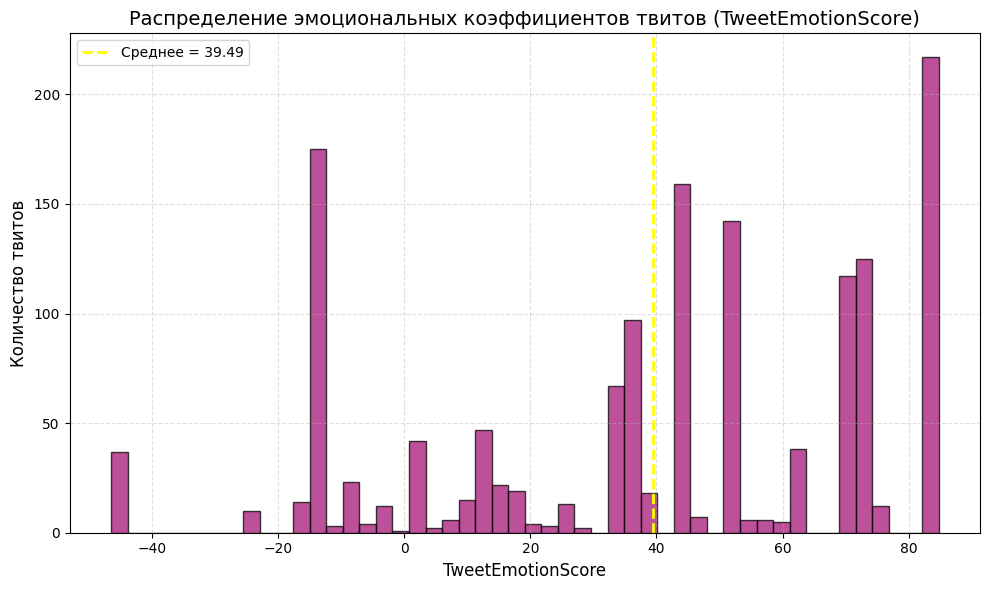

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем датасет
df = pd.read_csv("tweets_with_scores.csv")

# Берём только числовые значения, без NaN
scores = df["TweetEmotionScore"].dropna()

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, edgecolor='black', alpha=0.75, color='#A71777')

mean_score = scores.mean()
plt.axvline(mean_score, color='yellow', linestyle='--', linewidth=2,
            label=f'Среднее = {mean_score:.2f}')

plt.title("Распределение эмоциональных коэффициентов твитов (TweetEmotionScore)", fontsize=14)
plt.xlabel("TweetEmotionScore", fontsize=12)
plt.ylabel("Количество твитов", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()

plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Загружаем датасет
df = pd.read_csv("tweets_with_scores.csv")

# Берём только числовые значения, без NaN
scores = df["TweetEmotionScore"].dropna()

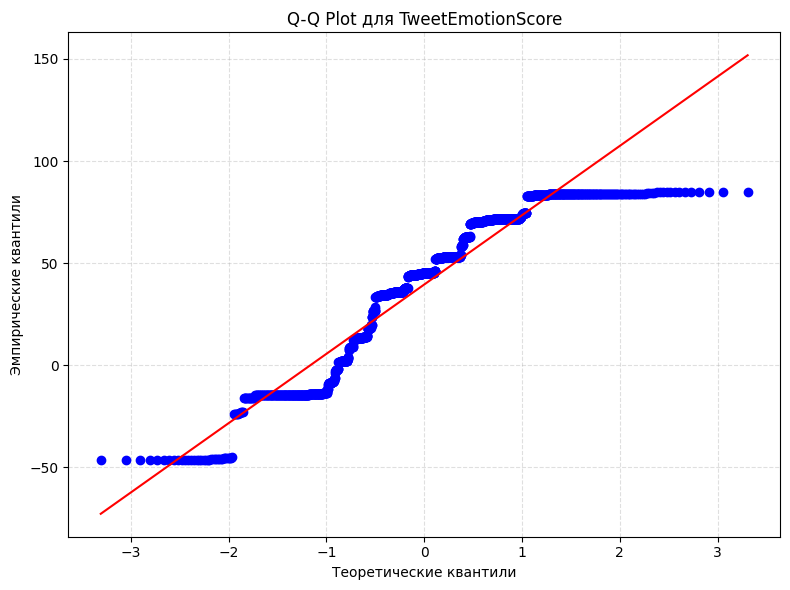

In [12]:
plt.figure(figsize=(8, 6))
stats.probplot(scores, dist="norm", plot=plt)
plt.title("Q-Q Plot для TweetEmotionScore")
plt.xlabel("Теоретические квантили")
plt.ylabel("Эмпирические квантили")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()